# Setting Up the Environment

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import re #to search for pattern among texts
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

Load the dataset

In [2]:
data = pd.read_csv("socialmedia.csv")

Inspect the data

In [3]:
print(data.head())
print(data.info())

   Unnamed: 0                                          statement   status
0           0                                         oh my gosh  Anxiety
1           1  trouble sleeping, confused mind, restless hear...  Anxiety
2           2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3           3  I've shifted my focus to something else but I'...  Anxiety
4           4  I'm restless and restless, it's been a month n...  Anxiety
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   statement   52681 non-null  object
 2   status      53043 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB
None


# Data Cleaning and Pre Processing

Check for Missing or duplicated data

In [4]:
#Check for missing values
print(data.isnull().sum())
#Drop rows with missing values
data = data.dropna()
#Drop any duplicate rows
data = data.drop_duplicates()

Unnamed: 0      0
statement     362
status          0
dtype: int64


Remove Punctuation and convert text to LowerCase

In [6]:
def clean_text(text):
           #remove punctuation
           text = re.sub(r'[^\w\s]','',text)
           #convert text to lowercase
           text = text.lower()
           return text

data['cleaned_text'] = data['statement'].apply(clean_text)

Remove Stopwords

In [7]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(statement):
              words=statement.split()
              words = [word for word in words if word not in stop_words]
              return ' '.join(words)
data['cleaned_text']=data['cleaned_text'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Convert Text Data to Numerical Data

In [8]:
#Initialize CountVectorizer and transfor the cleaned text data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['cleaned_text'])
#Target variable:sentiment
y = data['status']

# Train-Test Split

Divide the dataset into training and testing sets

In [9]:
#Split the data into 80% training and 20% testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

# Train the Logistic Regression Model

Initialize and Train the Model

In [10]:
#Initialize the Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)

#fit the model on the training data
log_reg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

Make Predictions

In [11]:
#predict on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model

Calculate the accuracy

In [12]:
accuracy = accuracy_score(y_test,y_pred)
print("Model Accuracy:",accuracy)

Model Accuracy: 0.756951694030559


Display the Classification report

In [13]:
#Detailed performance report
print("Classification Report:\n",classification_report(y_test,y_pred))

Classification Report:
                       precision    recall  f1-score   support

             Anxiety       0.80      0.76      0.78       755
             Bipolar       0.82      0.76      0.79       527
          Depression       0.70      0.69      0.69      3016
              Normal       0.87      0.95      0.91      3308
Personality disorder       0.81      0.59      0.68       237
              Stress       0.63      0.56      0.60       536
            Suicidal       0.64      0.62      0.63      2158

            accuracy                           0.76     10537
           macro avg       0.75      0.71      0.73     10537
        weighted avg       0.75      0.76      0.75     10537



# Visualize Sentiment Distribution and Results

Visualize Sentiment Distribution

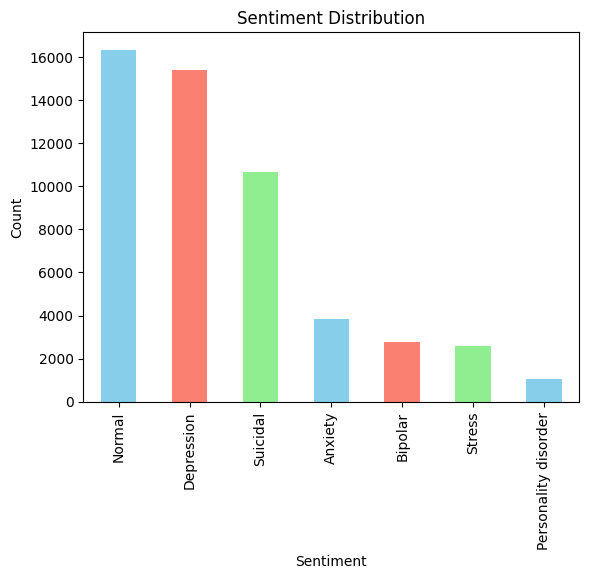

In [14]:
import matplotlib.pyplot as plt

data['status'].value_counts().plot(kind='bar',color=['skyblue','salmon','lightgreen'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

Visualize Model Predictions (Confusion Matrix)

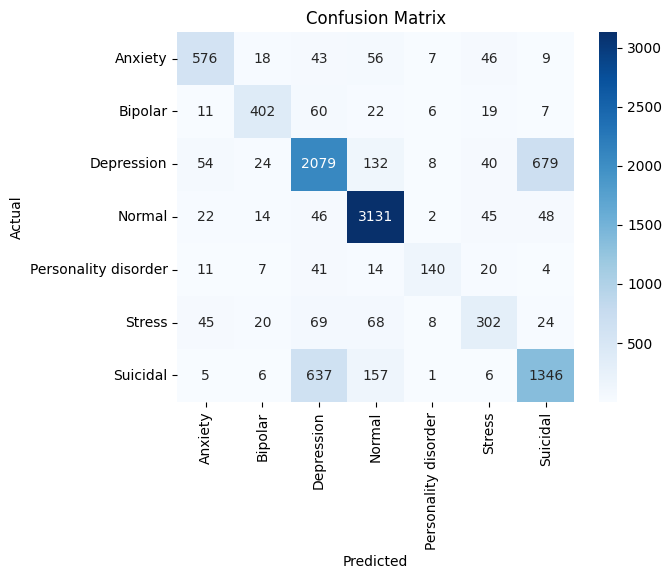

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#generate the confusion matrix
cm = confusion_matrix(y_test,y_pred,labels=log_reg.classes_)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=log_reg.classes_,yticklabels=log_reg.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()